In [72]:
!pip install yahoo_fin

In [73]:
!pip install requests_html

     |████████████████████████████████| 133kB 2.8MB/s 
ERROR: kaggle 1.5.6 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.9 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [0]:
import requests
import pandas as pd 
from yahoo_fin import stock_info as si 
from pandas_datareader import DataReader
import numpy as np

In [0]:
from yahoo_fin.stock_info import get_data, tickers_sp500, tickers_nasdaq, tickers_other, get_quote_table

In [0]:
tickers = si.tickers_sp500()

In [0]:
recommendations = []
targetMedians = []
currents = []
numberOfAnalyst = []
roa = []
roe = []
earningsGrowth = []
revenueGrowth = []
ebitdaMargins = []
profitMargins = []

for ticker in tickers:
    lhs_url = 'https://query2.finance.yahoo.com/v10/finance/quoteSummary/'
    rhs_url = '?formatted=true&crumb=swg7qs5y9UP&lang=en-US&region=US&' \
              'modules=upgradeDowngradeHistory,recommendationTrend,' \
              'financialData,earningsHistory,earningsTrend,industryTrend&' \
              'corsDomain=finance.yahoo.com'
              
    url =  lhs_url + ticker + rhs_url
    r = requests.get(url)
    if not r.ok:
        recommendation = 6
    try:
        result = r.json()['quoteSummary']['result'][0]
        recommendation =result['financialData']['recommendationMean']['raw']
        targetMedianPrice = result['financialData']['targetMedianPrice']['raw']
        currentPrice = result['financialData']['currentPrice']['raw']
        numberOfAnalystOpinions = result['financialData']['numberOfAnalystOpinions']['raw']
        returnOnAssets = result['financialData']['returnOnAssets']['raw']
        returnOnEquity = result['financialData']['returnOnEquity']['raw']
        eg = result['financialData']['earningsGrowth']['raw']
        rg = result['financialData']['revenueGrowth']['raw']
        em = result['financialData']['ebitdaMargins']['raw']
        pm = result['financialData']['profitMargins']['raw']


    except:
        recommendation = 0
        targetMedianPrice = 0
        currentPrice = 0
        numberOfAnalystOpinions = 0
        returnOnAssets = 0
        returnOnEquity = 0
        eg = 0
        rg = 0
        em = 0
        pm = 0
    
    recommendations.append(recommendation)
    targetMedians.append(targetMedianPrice)
    currents.append(currentPrice)
    numberOfAnalyst.append(numberOfAnalystOpinions)
    roa.append(returnOnAssets)
    roe.append(returnOnEquity)
    earningsGrowth.append(eg)
    revenueGrowth.append(rg)
    ebitdaMargins.append(em)
    profitMargins.append(pm)

In [124]:
dataframe = pd.DataFrame(list(zip(tickers, recommendations, numberOfAnalyst, targetMedians, currents, roa, roe, earningsGrowth, revenueGrowth, ebitdaMargins, profitMargins)), 
                         columns =['Company', 'Recommendations', 'numberOfAnalystOpinions', 'TargetPrice', 'CurrentPrice', 'ROA', 'ROE', 'EarningsGrowth', 'RevenueGrowth', 'ebitdaMargins', 'profitMargins']) 
dataframe = dataframe.set_index('Company')
#dataframe.to_csv('recommendations.csv')

dataframe.head()

,Recommendations,numberOfAnalystOpinions,TargetPrice,CurrentPrice,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins
Company,,,,,,,,,,
A,2.2,12,87.5,87.39,0.06819,0.13808,-0.439,0.000,0.24713,0.13044
AAL,6.0,0,0.0,0.00,0.00000,0.00000,0.000,0.000,0.00000,0.00000
AAP,2.3,13,150.0,138.62,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104
AAPL,2.0,37,325.0,349.15,0.12377,0.62094,0.037,0.005,0.28847,0.21350
ABBV,6.0,0,0.0,0.00,0.00000,0.00000,0.000,0.000,0.00000,0.00000


In [0]:
dataframe['potential'] = (dataframe['TargetPrice'] / dataframe['CurrentPrice'] - 1) * 100 

In [0]:
dataframe = dataframe.query('Recommendations != 6')

In [130]:
dataframe.head(10)

,Recommendations,numberOfAnalystOpinions,TargetPrice,CurrentPrice,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential
Company,,,,,,,,,,,
A,2.2,12,87.5,87.390,0.06819,0.13808,-0.439,0.000,0.24713,0.13044,0.125873
AAP,2.3,13,150.0,138.620,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104,8.209494
AAPL,2.0,37,325.0,349.150,0.12377,0.62094,0.037,0.005,0.28847,0.21350,-6.916798
ABC,2.4,15,100.0,95.505,0.02856,0.47216,35.069,0.095,0.01221,0.00850,4.706560
ABMD,2.3,5,225.0,240.490,0.13687,0.20277,-0.566,-0.002,0.31999,0.24142,-6.441016
ABT,1.9,15,105.0,89.880,0.04592,0.11563,-0.178,0.025,0.25007,0.11151,16.822430
ACN,2.1,24,188.0,204.340,0.13437,0.34007,0.098,0.066,0.16119,0.11133,-7.996476
ADBE,2.0,23,350.0,400.550,0.10775,0.31790,0.441,0.188,0.34969,0.27720,-12.620147
ADI,2.0,23,130.0,120.130,0.04292,0.09528,-0.265,-0.137,0.41440,0.20051,8.216099


In [132]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, A to ZTS
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Recommendations          334 non-null    float64
 1   numberOfAnalystOpinions  334 non-null    int64  
 2   ROA                      334 non-null    float64
 3   ROE                      334 non-null    float64
 4   EarningsGrowth           334 non-null    float64
 5   RevenueGrowth            334 non-null    float64
 6   ebitdaMargins            334 non-null    float64
 7   profitMargins            334 non-null    float64
 8   potential                334 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 36.1+ KB


In [0]:
dataframe.drop(columns = ['TargetPrice', 'CurrentPrice'], inplace = True)

In [0]:
dataframe = dataframe.query('ROE < 100')

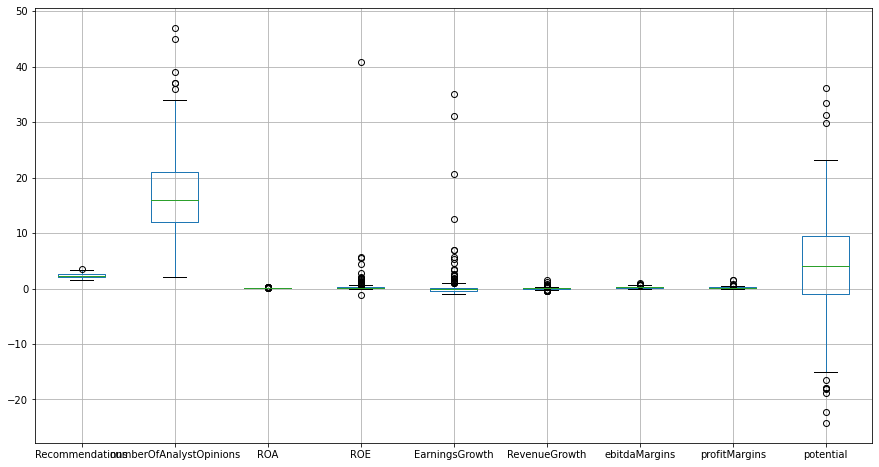

In [151]:
dataframe.boxplot(figsize=(15,8))

In [0]:
import matplotlib.pyplot as plt

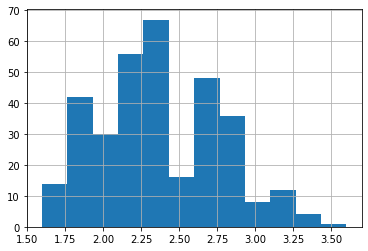

In [136]:
dataframe['Recommendations'].hist(bins = 12)

In [137]:
dataframe.corr()

,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential
Recommendations,1.000000,-0.260898,0.058232,-0.088003,-0.012069,-0.203896,-0.036764,0.079841,-0.471158
numberOfAnalystOpinions,-0.260898,1.000000,0.065507,-0.044059,0.024103,0.163355,0.050006,0.058028,0.112548
ROA,0.058232,0.065507,1.000000,0.034898,-0.025643,0.133606,0.193663,0.099802,-0.275247
ROE,-0.088003,-0.044059,0.034898,1.000000,-0.018427,-0.026160,-0.019781,0.088239,0.113318
EarningsGrowth,-0.012069,0.024103,-0.025643,-0.018427,1.000000,0.021354,-0.029464,0.139182,-0.049297
RevenueGrowth,-0.203896,0.163355,0.133606,-0.026160,0.021354,1.000000,0.129829,-0.113343,0.038542
ebitdaMargins,-0.036764,0.050006,0.193663,-0.019781,-0.029464,0.129829,1.000000,0.399676,-0.003573
profitMargins,0.079841,0.058028,0.099802,0.088239,0.139182,-0.113343,0.399676,1.000000,-0.099691
potential,-0.471158,0.112548,-0.275247,0.113318,-0.049297,0.038542,-0.003573,-0.099691,1.000000


In [0]:
short_list = dataframe.query('Recommendations <= 2')

In [23]:
short_list['Recommendations'].value_counts()

2.0    45
1.9    39
1.8    22
1.7    11
1.6     7
Name: Recommendations, dtype: int64

In [0]:
short_list_16 = short_list.query('Recommendations == 1.6')

In [25]:
short_list_16

,Recommendations
Company,
BSX,1.6
DXCM,1.6
GOOG,1.6
J,1.6
KMX,1.6
LKQ,1.6
PWR,1.6


In [0]:
short_list_17 = short_list.query('Recommendations == 1.7')

In [27]:
short_list_17

,Recommendations
Company,
AIZ,1.7
AMZN,1.7
CNC,1.7
DHR,1.7
ICE,1.7
IQV,1.7
LHX,1.7
MSFT,1.7
NRG,1.7


In [0]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [138]:
model = KMeans(n_clusters=3, random_state=12345)
model.fit(dataframe)


print("Центроиды кластеров:")
print(model.cluster_centers_)

Центроиды кластеров:
[[ 2.52484848e+00  1.39151515e+01  6.93763633e-02  5.96124847e-01
   5.42557576e-01  1.21757576e-02  2.54253394e-01  1.87709576e-01
  -2.26275023e+00]
 [ 1.70000000e+00  1.10000000e+01  7.37600000e-02  5.18375000e+02
  -7.19000000e-01 -6.70000000e-02  1.92450000e-01  4.21390000e-01
   2.33505450e+01]
 [ 2.19821429e+00  1.95892857e+01  5.31816074e-02  2.56344465e-01
   1.50053571e-01  3.75297619e-02  2.60019167e-01  1.56463036e-01
   1.04524314e+01]]


In [139]:
print("Целевая функция:")
print(model.inertia_)

Целевая функция:
32222.420481254765


In [140]:
model = KMeans(n_clusters=4, random_state=12345)
model.fit(dataframe)

print("Целевая функция:")
print(model.inertia_)

Целевая функция:
24226.203944934034


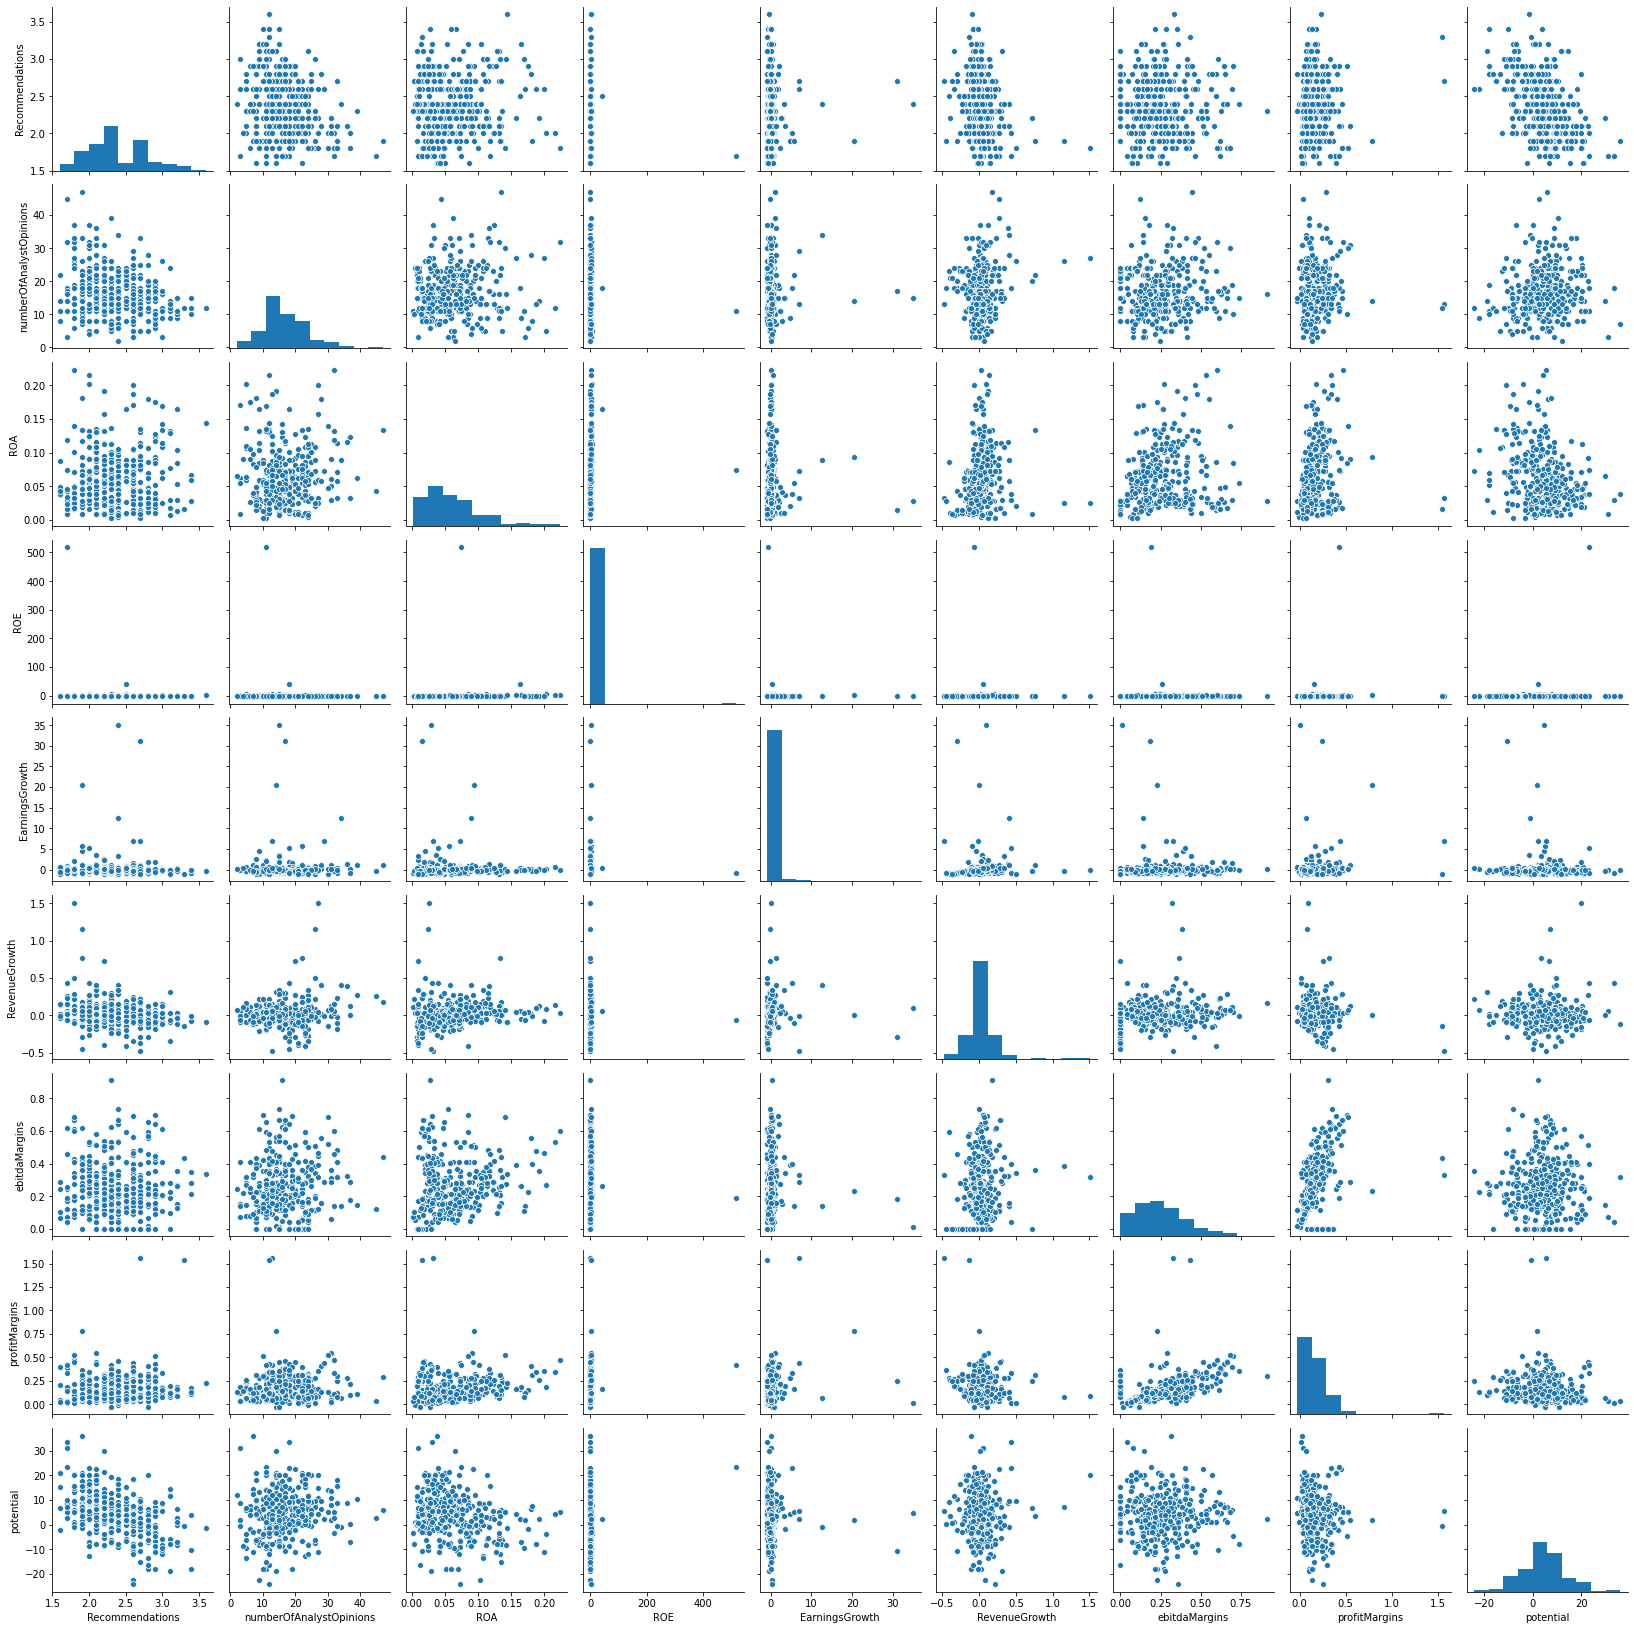

In [141]:
import seaborn as sns
sns.pairplot(dataframe, diag_kind='hist')

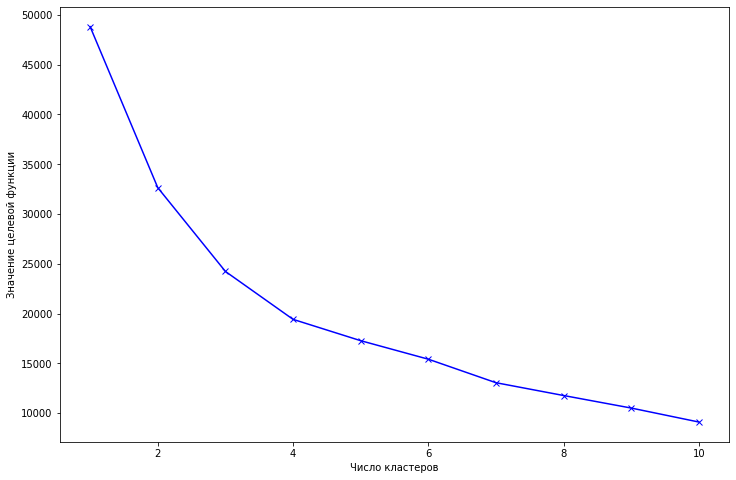

In [152]:
distortion = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(dataframe)
    distortion.append(model.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


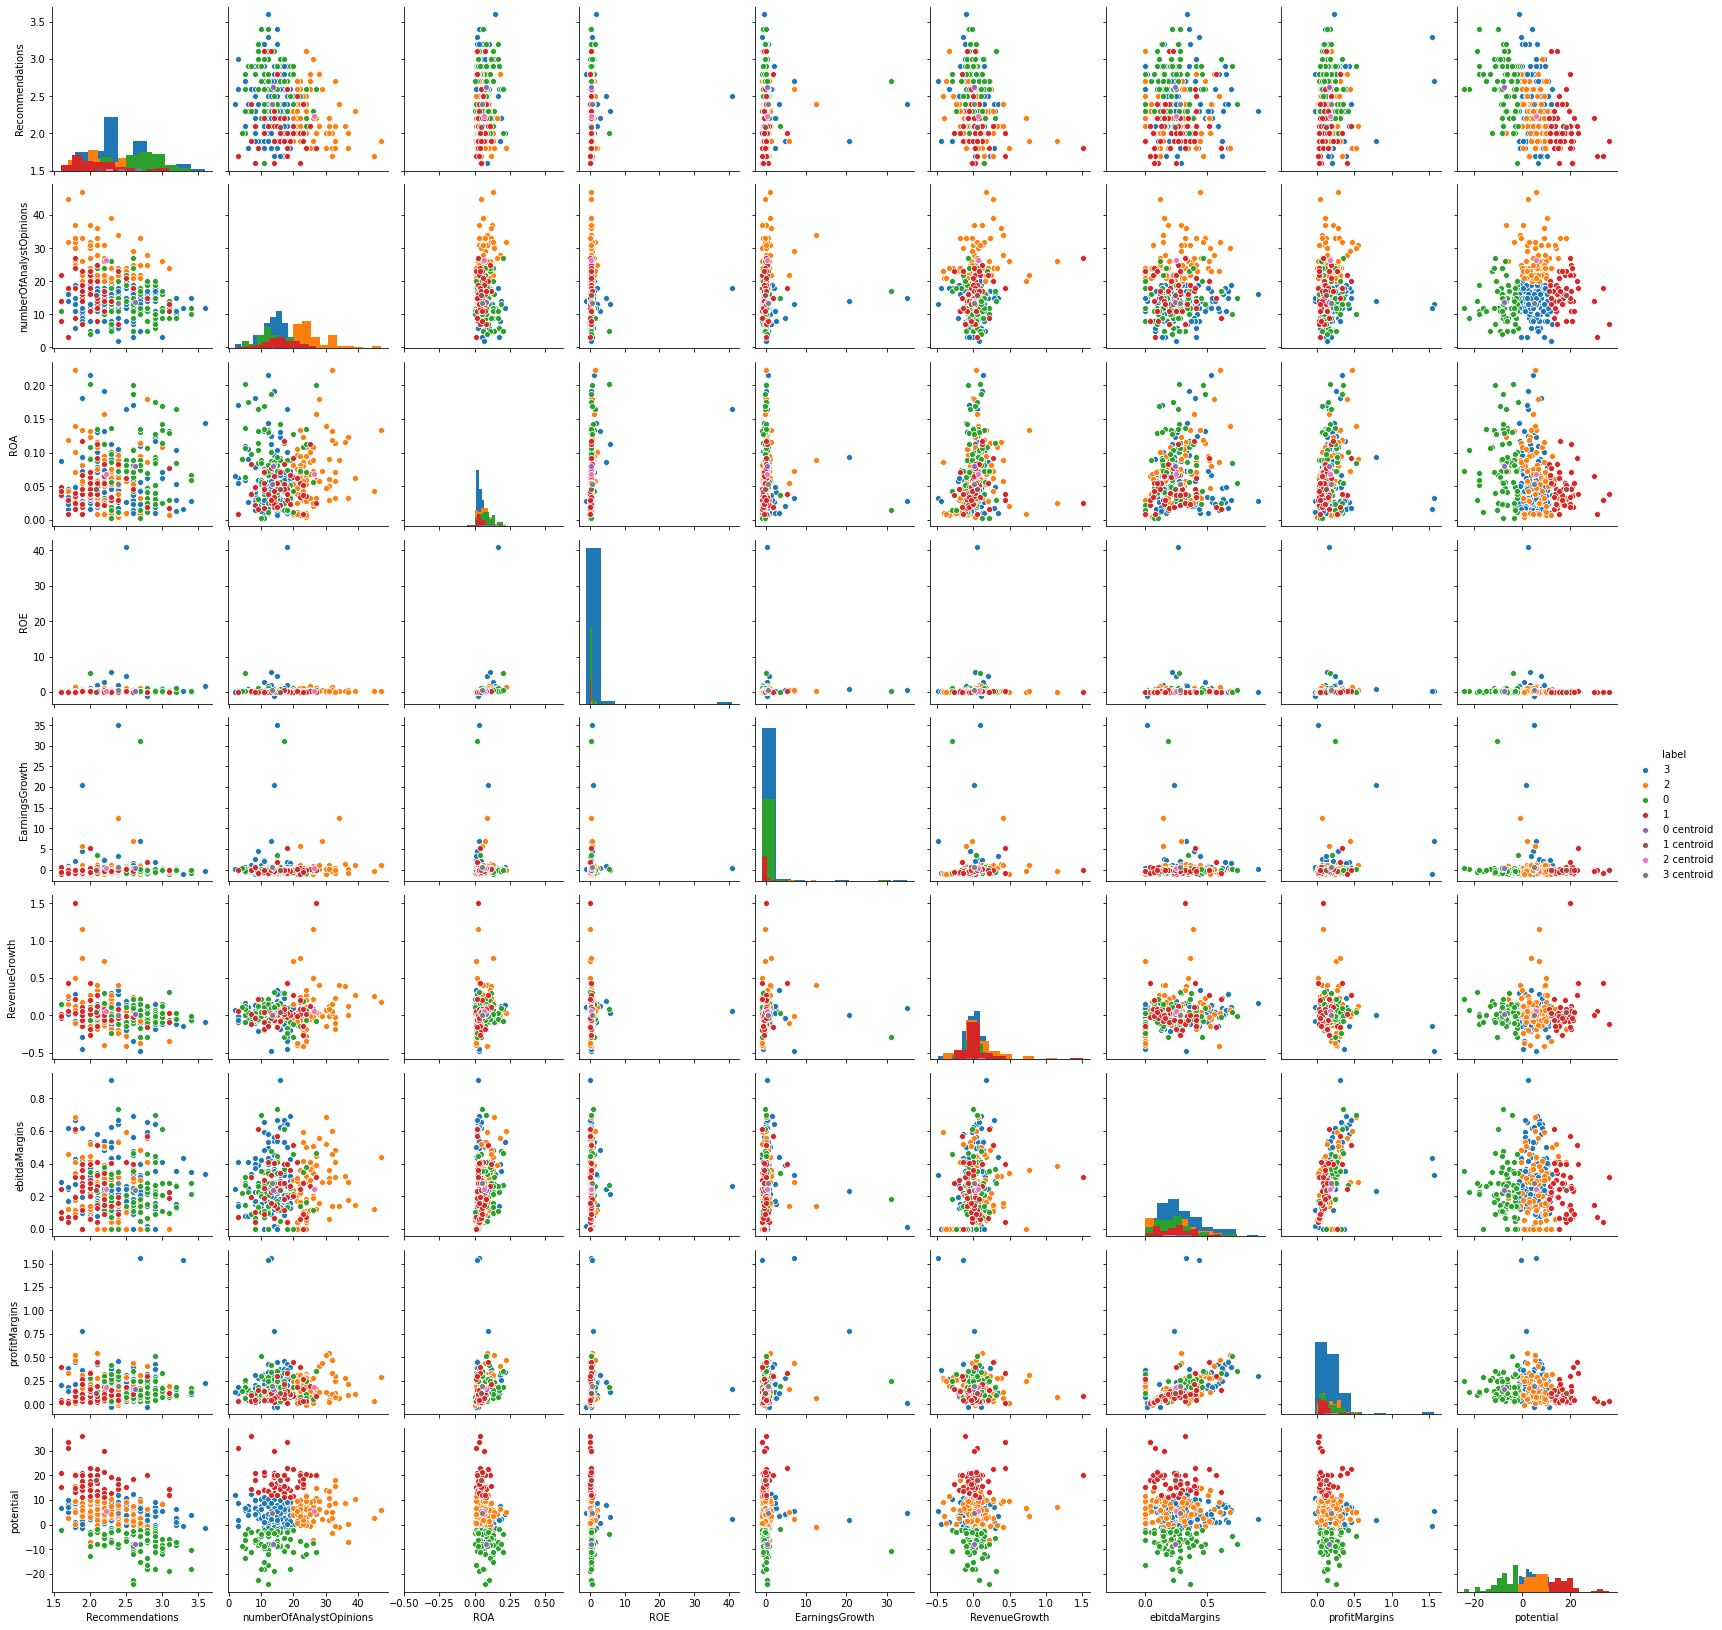

In [153]:
model = KMeans(n_clusters=4, random_state=12345)
model.fit(dataframe)
centroids = pd.DataFrame(model.cluster_centers_, columns=dataframe.columns)
# Добавление столбца с номером кластера
dataframe['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
data_all = pd.concat([dataframe, centroids], ignore_index=True)

# Построение графика
sns.pairplot(data_all, hue='label', diag_kind='hist')

In [154]:
dataframe.drop('label', axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [155]:
dataframe.head(1)

,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential
Company,,,,,,,,,
A,2.2,12,0.06819,0.13808,-0.439,0.0,0.24713,0.13044,0.125873


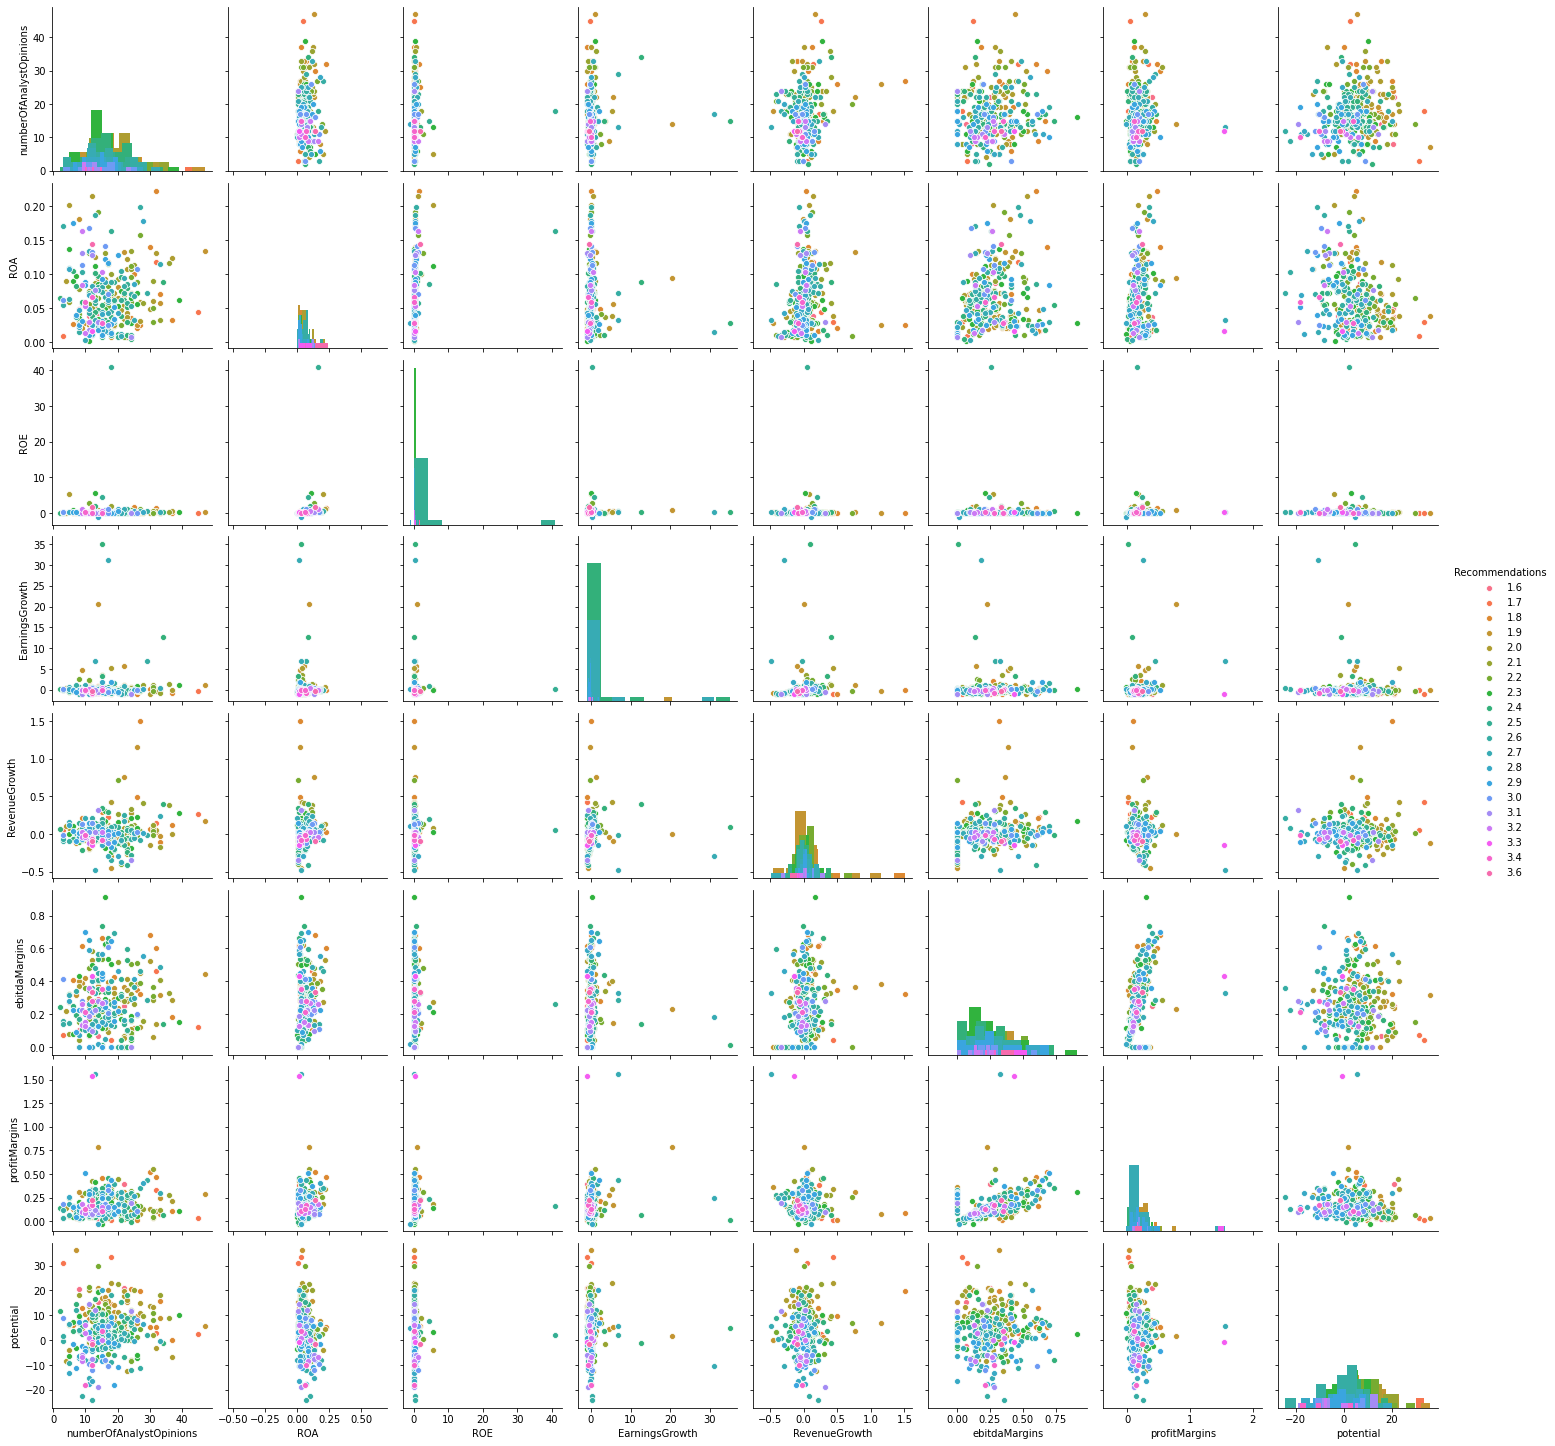

In [156]:
# Построение графика
pairgrid = sns.pairplot(dataframe, hue='Recommendations', diag_kind='hist')

data = dataframe.drop(columns=['Recommendations'])
# Обучение модели
model = KMeans(random_state = 12345, n_clusters=5)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
#data['label'] = model.labels_.astype(str)
#centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
#data_all = pd.concat([data, centroids], ignore_index=True)

# Дополнительный слой для центроидов
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

In [157]:
dataframe.describe()

,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,2.360060,16.777778,0.061206,0.424704,0.344538,0.024967,0.257162,0.171946,4.152116
std,0.399543,7.137116,0.042951,2.294398,3.024976,0.180863,0.169122,0.156456,8.953201
min,1.600000,2.000000,0.002370,-1.117240,-0.995000,-0.484000,0.000000,-0.027070,-24.241203
25%,2.000000,12.000000,0.027820,0.101100,-0.362000,-0.064000,0.139260,0.078800,-0.922446
50%,2.300000,16.000000,0.053300,0.176630,-0.063000,0.015000,0.235710,0.134140,4.140743
75%,2.600000,21.000000,0.083210,0.294580,0.171000,0.085000,0.356740,0.241940,9.401173
max,3.600000,47.000000,0.223170,40.839690,35.069000,1.509000,0.911510,1.561040,36.108887


Количество аномалий:  1


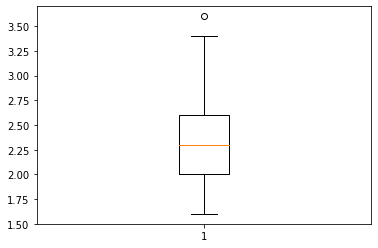

In [159]:
boxplot = plt.boxplot(dataframe['Recommendations'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = dataframe[dataframe["Recommendations"].isin(outliers)]

print("Количество аномалий: ", len(df_outliers))

Количество аномалий:  6


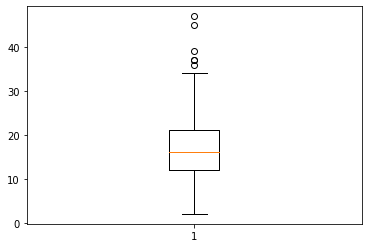

In [160]:
boxplot = plt.boxplot(dataframe['numberOfAnalystOpinions'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = dataframe[dataframe["numberOfAnalystOpinions"].isin(outliers)]

print("Количество аномалий: ", len(df_outliers))

Количество аномалий:  11


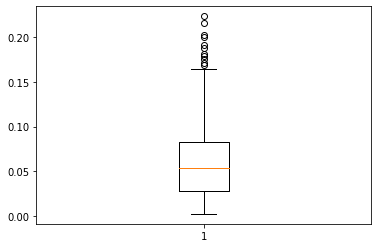

In [161]:
boxplot = plt.boxplot(dataframe['ROA'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = dataframe[dataframe["ROA"].isin(outliers)]

print("Количество аномалий: ", len(df_outliers))

Количество аномалий:  29


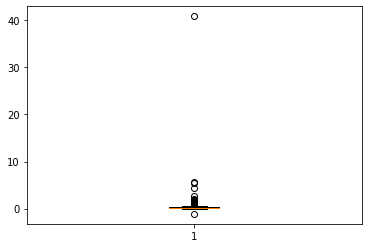

In [168]:
boxplot = plt.boxplot(dataframe['ROE'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = dataframe[dataframe["ROE"].isin(outliers)]

print("Количество аномалий: ", len(df_outliers))

Количество аномалий:  25


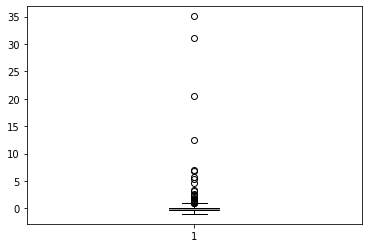

In [169]:
boxplot = plt.boxplot(dataframe['EarningsGrowth'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = dataframe[dataframe["EarningsGrowth"].isin(outliers)]

print("Количество аномалий: ", len(df_outliers))

Количество аномалий:  23


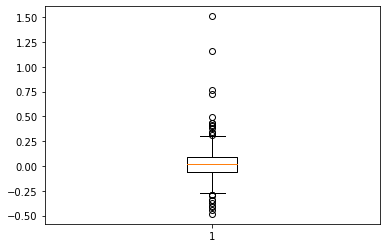

In [170]:
boxplot = plt.boxplot(dataframe['RevenueGrowth'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = dataframe[dataframe["RevenueGrowth"].isin(outliers)]

print("Количество аномалий: ", len(df_outliers))

In [173]:
dataframe['quantile_rec'] = pd.qcut(dataframe['Recommendations'], 4, labels=['1', '2', '3', '4'])
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential,quantile_rec
Company,,,,,,,,,,
A,2.2,12,0.06819,0.13808,-0.439,0.000,0.24713,0.13044,0.125873,2
AAP,2.3,13,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104,8.209494,2
AAPL,2.0,37,0.12377,0.62094,0.037,0.005,0.28847,0.21350,-6.916798,1
ABC,2.4,15,0.02856,0.47216,35.069,0.095,0.01221,0.00850,4.706560,3
ABMD,2.3,5,0.13687,0.20277,-0.566,-0.002,0.31999,0.24142,-6.441016,2


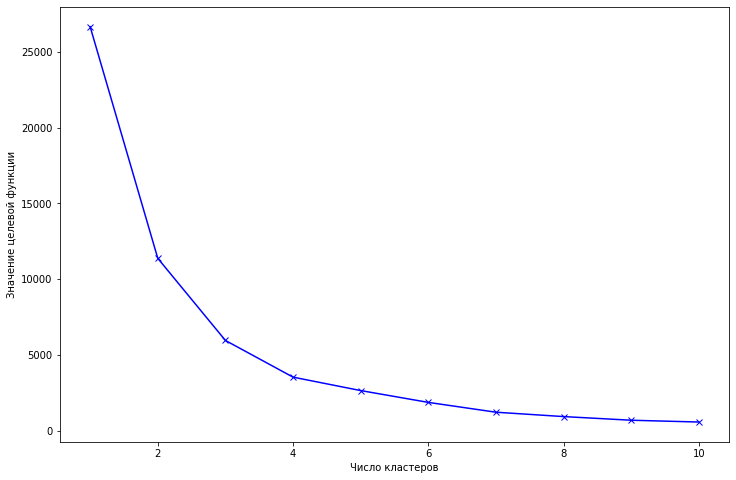

In [172]:
distortion = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(dataframe[['Recommendations', 'potential']])
    distortion.append(model.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

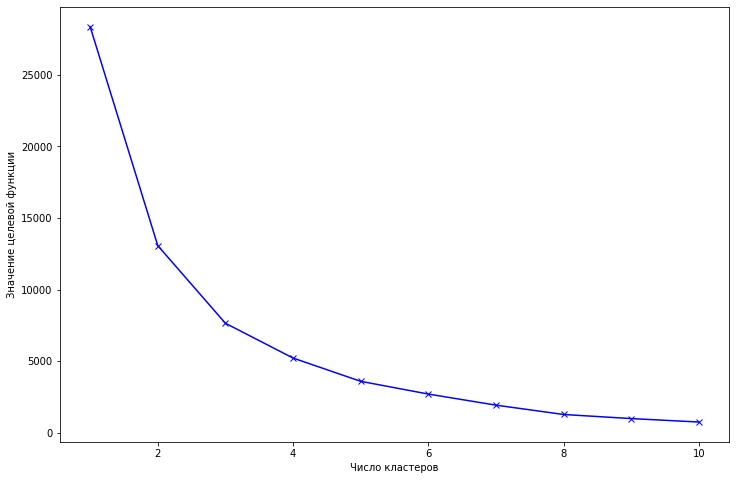

In [178]:
distortion = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(dataframe[['ROE', 'potential']])
    distortion.append(model.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

In [177]:
dataframe['quantile_roa'] = pd.qcut(dataframe['ROA'], 4, labels=['1', '2', '3', '4'])
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential,quantile_rec,quantile_roa
Company,,,,,,,,,,,
A,2.2,12,0.06819,0.13808,-0.439,0.000,0.24713,0.13044,0.125873,2,3
AAP,2.3,13,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104,8.209494,2,2
AAPL,2.0,37,0.12377,0.62094,0.037,0.005,0.28847,0.21350,-6.916798,1,4
ABC,2.4,15,0.02856,0.47216,35.069,0.095,0.01221,0.00850,4.706560,3,2
ABMD,2.3,5,0.13687,0.20277,-0.566,-0.002,0.31999,0.24142,-6.441016,2,4


In [179]:
dataframe['quantile_roe'] = pd.qcut(dataframe['ROE'], 4, labels=['1', '2', '3', '4'])
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential,quantile_rec,quantile_roa,quantile_roe
Company,,,,,,,,,,,,
A,2.2,12,0.06819,0.13808,-0.439,0.000,0.24713,0.13044,0.125873,2,3,2
AAP,2.3,13,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104,8.209494,2,2,2
AAPL,2.0,37,0.12377,0.62094,0.037,0.005,0.28847,0.21350,-6.916798,1,4,4
ABC,2.4,15,0.02856,0.47216,35.069,0.095,0.01221,0.00850,4.706560,3,2,4
ABMD,2.3,5,0.13687,0.20277,-0.566,-0.002,0.31999,0.24142,-6.441016,2,4,3


In [180]:
dataframe['quantile_eg'] = pd.qcut(dataframe['EarningsGrowth'], 4, labels=['1', '2', '3', '4'])
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential,quantile_rec,quantile_roa,quantile_roe,quantile_eg
Company,,,,,,,,,,,,,
A,2.2,12,0.06819,0.13808,-0.439,0.000,0.24713,0.13044,0.125873,2,3,2,1
AAP,2.3,13,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104,8.209494,2,2,2,1
AAPL,2.0,37,0.12377,0.62094,0.037,0.005,0.28847,0.21350,-6.916798,1,4,4,3
ABC,2.4,15,0.02856,0.47216,35.069,0.095,0.01221,0.00850,4.706560,3,2,4,4
ABMD,2.3,5,0.13687,0.20277,-0.566,-0.002,0.31999,0.24142,-6.441016,2,4,3,1


In [181]:
dataframe['quantile_rg'] = pd.qcut(dataframe['RevenueGrowth'], 4, labels=['1', '2', '3', '4'])
dataframe['quantile_em'] = pd.qcut(dataframe['ebitdaMargins'], 4, labels=['1', '2', '3', '4'])
dataframe['quantile_pm'] = pd.qcut(dataframe['profitMargins'], 4, labels=['1', '2', '3', '4'])
dataframe['quantile_poten'] = pd.qcut(dataframe['potential'], 4, labels=['1', '2', '3', '4'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [182]:
dataframe.head()

,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential,quantile_rec,quantile_roa,quantile_roe,quantile_eg,quantile_rg,quantile_em,quantile_pm,quantile_poten
Company,,,,,,,,,,,,,,,,,
A,2.2,12,0.06819,0.13808,-0.439,0.000,0.24713,0.13044,0.125873,2,3,2,1,2,3,2,2
AAP,2.3,13,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104,8.209494,2,2,2,1,1,1,1,3
AAPL,2.0,37,0.12377,0.62094,0.037,0.005,0.28847,0.21350,-6.916798,1,4,4,3,2,3,3,1
ABC,2.4,15,0.02856,0.47216,35.069,0.095,0.01221,0.00850,4.706560,3,2,4,4,4,1,1,3
ABMD,2.3,5,0.13687,0.20277,-0.566,-0.002,0.31999,0.24142,-6.441016,2,4,3,1,2,3,3,1


In [0]:
df = dataframe.drop(columns = ['Recommendations', 'numberOfAnalystOpinions', 'ROA', 'ROE', 'EarningsGrowth', 'RevenueGrowth', 'ebitdaMargins', 'profitMargins'])

In [185]:
df.head()

,potential,quantile_rec,quantile_roa,quantile_roe,quantile_eg,quantile_rg,quantile_em,quantile_pm,quantile_poten
Company,,,,,,,,,
A,0.125873,2,3,2,1,2,3,2,2
AAP,8.209494,2,2,2,1,1,1,1,3
AAPL,-6.916798,1,4,4,3,2,3,3,1
ABC,4.706560,3,2,4,4,4,1,1,3
ABMD,-6.441016,2,4,3,1,2,3,3,1


In [0]:
df['quantile_rec'] = df['quantile_rec'].astype('int')
df['quantile_roa'] = df['quantile_roa'].astype('int')
df['quantile_roe'] = df['quantile_roe'].astype('int')
df['quantile_eg'] = df['quantile_eg'].astype('int')
df['quantile_rg'] = df['quantile_rg'].astype('int')
df['quantile_em'] = df['quantile_em'].astype('int')
df['quantile_pm'] = df['quantile_pm'].astype('int')
df['quantile_poten'] = df['quantile_poten'].astype('int')

In [190]:
df.corr()

,potential,quantile_rec,quantile_roa,quantile_roe,quantile_eg,quantile_rg,quantile_em,quantile_pm,quantile_poten
potential,1.000000,-0.441691,-0.265379,-0.263844,-0.042629,-0.050018,0.019937,-0.174915,0.894829
quantile_rec,-0.441691,1.000000,0.032981,0.061902,-0.071963,-0.169465,-0.082703,0.069132,-0.415293
quantile_roa,-0.265379,0.032981,1.000000,0.736365,0.222269,0.249838,0.137194,0.086864,-0.279829
quantile_roe,-0.263844,0.061902,0.736365,1.000000,0.258219,0.201904,0.072483,0.168351,-0.258259
quantile_eg,-0.042629,-0.071963,0.222269,0.258219,1.000000,0.404419,0.188715,0.126400,-0.022197
quantile_rg,-0.050018,-0.169465,0.249838,0.201904,0.404419,1.000000,0.029343,-0.025781,-0.071318
quantile_em,0.019937,-0.082703,0.137194,0.072483,0.188715,0.029343,1.000000,0.494300,0.041327
quantile_pm,-0.174915,0.069132,0.086864,0.168351,0.126400,-0.025781,0.494300,1.000000,-0.133631
quantile_poten,0.894829,-0.415293,-0.279829,-0.258259,-0.022197,-0.071318,0.041327,-0.133631,1.000000


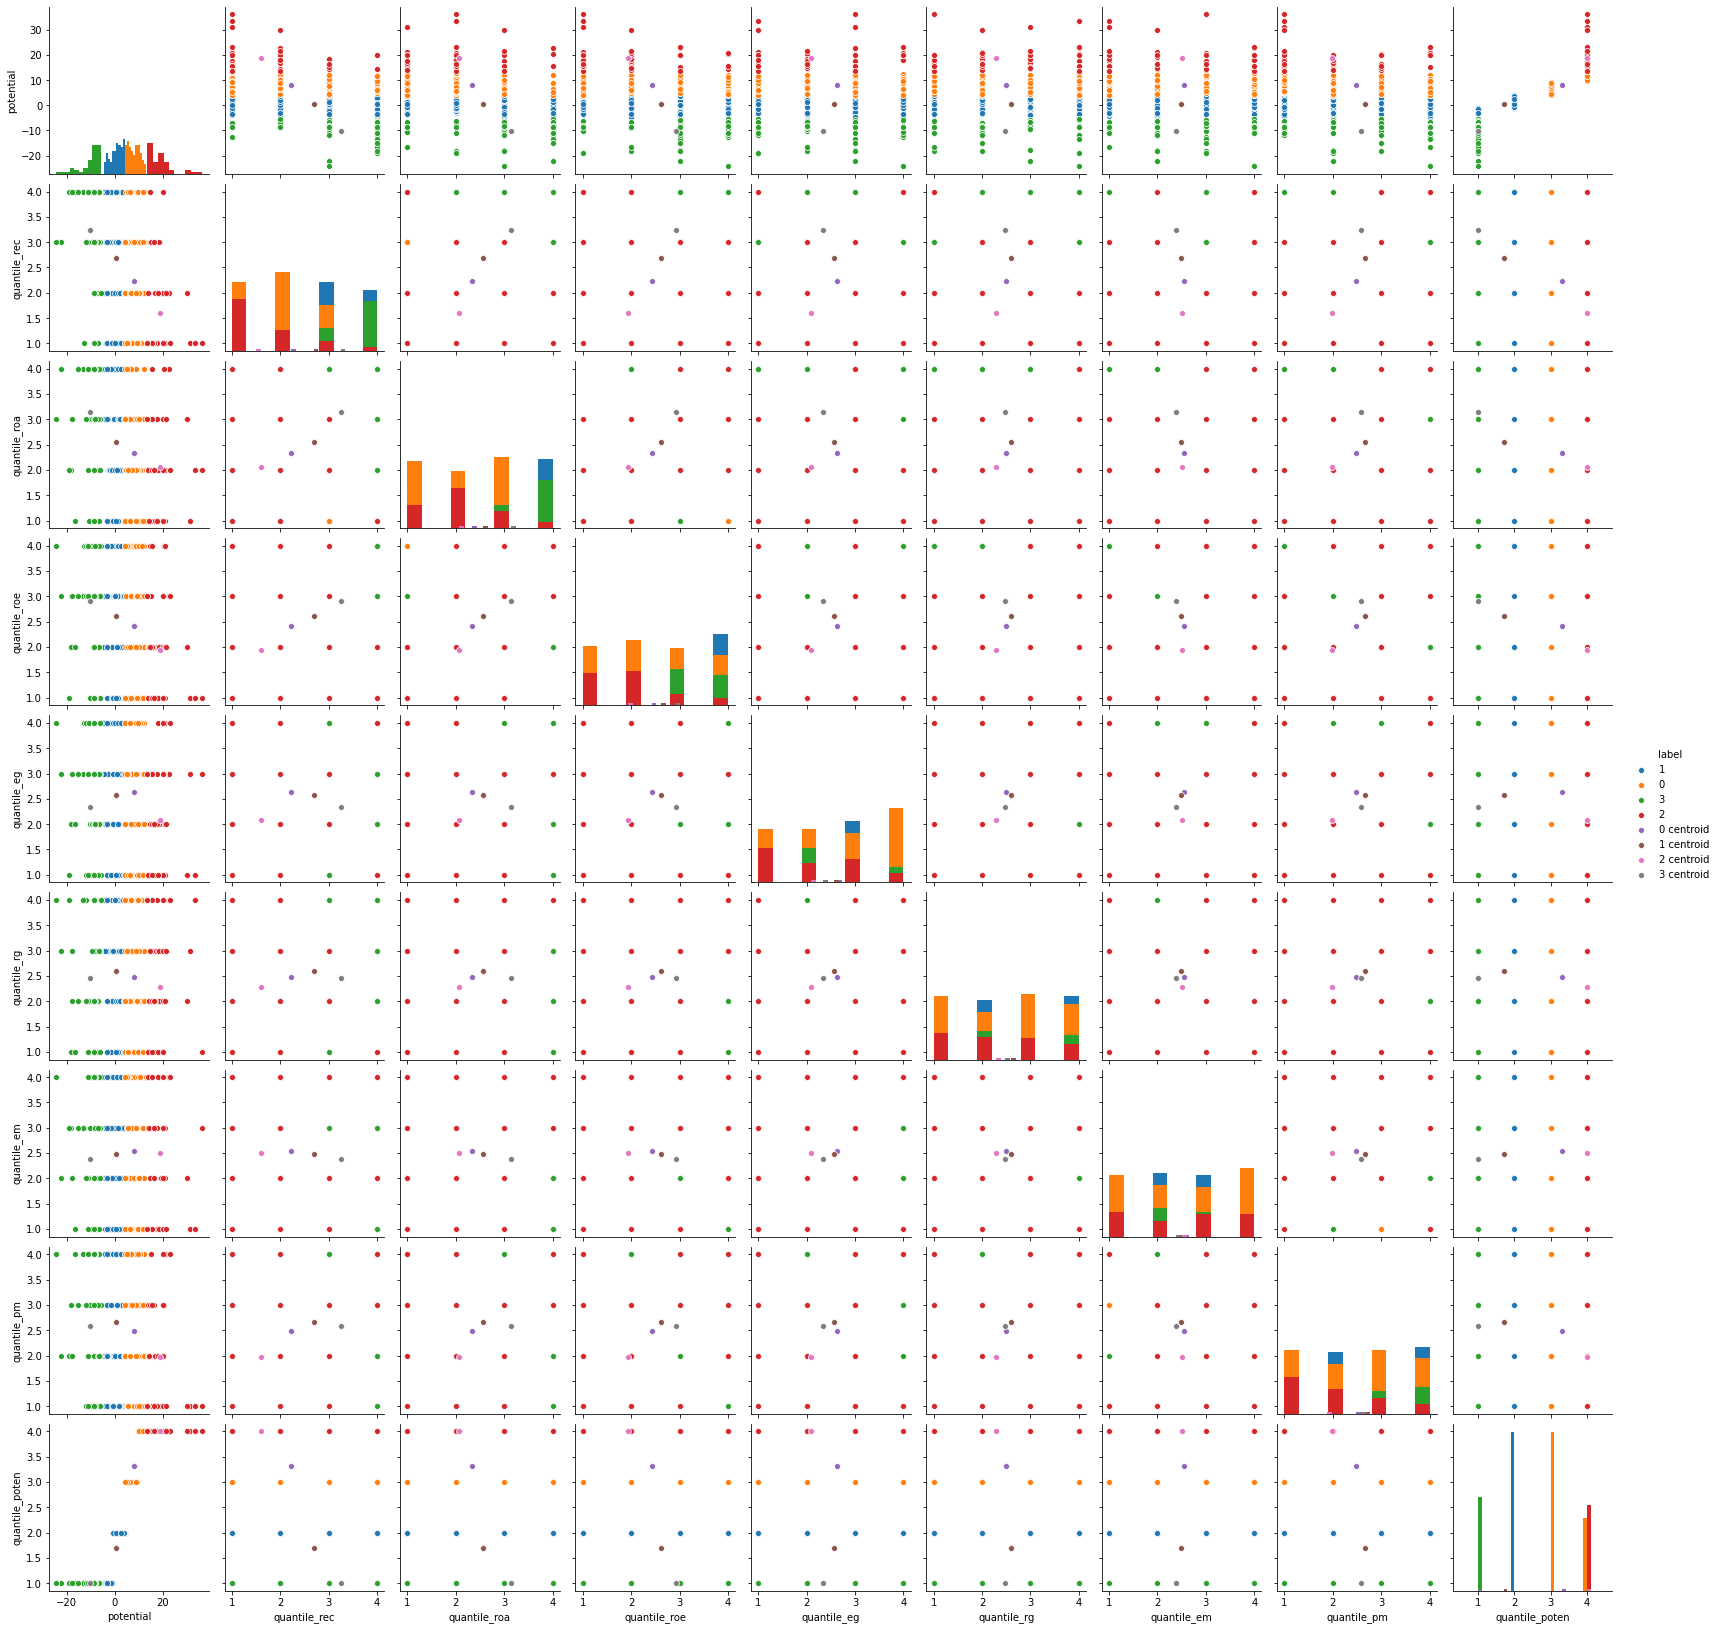

In [192]:
model = KMeans(n_clusters=4, random_state=12345)
model.fit(df)
centroids = pd.DataFrame(model.cluster_centers_, columns=df.columns)
# Добавление столбца с номером кластера
df['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
data_all = pd.concat([df, centroids], ignore_index=True)

# Построение графика
sns.pairplot(data_all, hue='label', diag_kind='hist')

In [0]:
from sklearn.ensemble import IsolationForest

In [194]:
dataframe.head()

,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential,quantile_rec,quantile_roa,quantile_roe,quantile_eg,quantile_rg,quantile_em,quantile_pm,quantile_poten,label
Company,,,,,,,,,,,,,,,,,,
A,2.2,12,0.06819,0.13808,-0.439,0.000,0.24713,0.13044,0.125873,2,3,2,1,2,3,2,2,1
AAP,2.3,13,0.03404,0.10953,-0.682,-0.086,0.09282,0.04104,8.209494,2,2,2,1,1,1,1,3,1
AAPL,2.0,37,0.12377,0.62094,0.037,0.005,0.28847,0.21350,-6.916798,1,4,4,3,2,3,3,1,2
ABC,2.4,15,0.02856,0.47216,35.069,0.095,0.01221,0.00850,4.706560,3,2,4,4,4,1,1,3,1
ABMD,2.3,5,0.13687,0.20277,-0.566,-0.002,0.31999,0.24142,-6.441016,2,4,3,1,2,3,3,1,0


In [201]:
dataframe.drop(columns = ['quantile_rec', 'quantile_roa', 'quantile_roe', 'quantile_eg', 'quantile_rg', 'quantile_em', 'quantile_pm', 'quantile_poten', 'label'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [196]:
data = dataframe[['ROA', 'ROE']]

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data)
estimator = isolation_forest.fit_predict(data)
outliers = []
for i in range(1, len(estimator)):
    if estimator[i] == -1:
        outliers.append(estimator[i])


print("Количество аномалий: ", len(outliers))

Количество аномалий:  32


In [198]:
!pip install pyod

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 2.1MB 4.9MB/s 
  Created wheel for pyod: filename=pyod-0.8.0-cp36-none-any.whl size=105563 sha256=318359a4e07cf488ecc3d52fd4131b7f615911542171c17743b548cc1acaa20b
  Stored in directory: /root/.cache/pip/wheels/ba/a6/81/2dd042e240090f3603a686b897d03402219a86e3f61bc71184
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=6400976cc0d5860f61d19c66b680a2ad9c272401f8c87e2948453dc239201d95
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=1a943d88232e15cc13a4248ec5ee0e3ddeab0db17cdae74361549dee7b30f6f9
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [199]:
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

data = dataframe[['ROA', 'ROE']]

model = KNN()
estimation_knn = model.fit_predict(data) == 1
outliers_knn = estimation_knn.sum()
print("Количество аномалий (KNN): ", outliers_knn)

isolation_forest = IsolationForest(n_estimators=100)
estimation_iforest = isolation_forest.fit_predict(data) == -1
outliers_iforest = estimation_iforest.sum()
print("Количество аномалий (изоляционный лес): ", outliers_iforest)

matched = (estimation_knn ) & (estimation_iforest )

print("Совпало: ", matched.sum())

Количество аномалий (KNN):  34
Количество аномалий (изоляционный лес):  35
Совпало:  27


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [0]:
hot_list = dataframe.query('Recommendations < 2.4 & potential > 10 &  EarningsGrowth > 0.05 & RevenueGrowth > 0.05')

In [210]:
hot_list.sort_values(by = 'potential')

,Recommendations,numberOfAnalystOpinions,ROA,ROE,EarningsGrowth,RevenueGrowth,ebitdaMargins,profitMargins,potential
Company,,,,,,,,,
NFLX,2.3,39,0.06229,0.31631,1.066,0.276,0.15007,0.10428,10.229778
MET,2.2,11,0.01011,0.13816,2.393,0.123,0.16905,0.12448,11.317254
WMT,2.0,31,0.06056,0.20627,0.053,0.086,0.06395,0.02811,13.449523
MRK,1.9,17,0.11759,0.37554,0.125,0.115,0.39637,0.21104,15.571020
CVS,2.0,22,0.03458,0.11501,0.404,0.085,0.06440,0.02767,19.951412
AMAT,2.1,25,0.11317,0.33858,0.171,0.118,0.26181,0.18892,20.274914
NEM,2.0,18,0.03887,0.21283,5.314,0.432,0.39931,0.33657,23.069088
